<a href="https://colab.research.google.com/github/Megacity1/ML-ASSESSMENT/blob/main/Machine_Learning_Assessment(K_mean_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
#importing the dataet
dataset = pd.read_csv('https://raw.githubusercontent.com/Megacity1/ML-ASSESSMENT/main/weatherAUS.csv')

In [24]:
#selecting the feature
weather = dataset[['MinTemp', 'MaxTemp']]

weather.columns = ['MinTemp', 'MaxTemp']

In [25]:
#checking the null values
weather.isnull().sum()

MinTemp    1485
MaxTemp    1261
dtype: int64

In [26]:
#dropping the nulls if any
weather_ref = weather.dropna(how='any', axis=0)

weather_ref.isnull().sum()

MinTemp    0
MaxTemp    0
dtype: int64

In [27]:
#selcting feature 
X = weather_ref.iloc[0:3000, [0, 1]].values

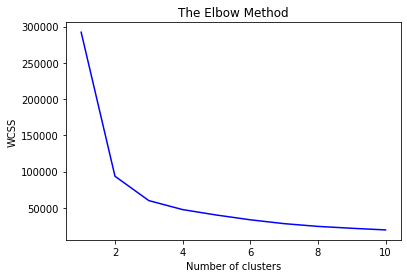

In [28]:

#evaluation for the value of k(clusters)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss , color = 'blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

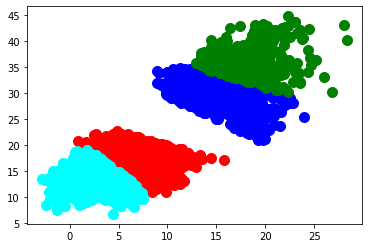

In [30]:
#clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

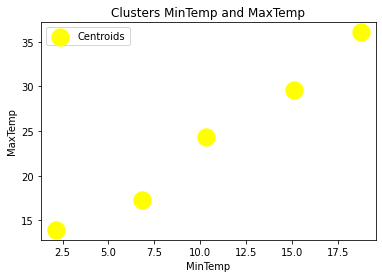

In [31]:
#plotting of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters MinTemp and MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.legend()
plt.show()